In [66]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
#Рассчитаем основные статистики для переменных. 0 и 1 - значения моды

data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
pd.concat([data.describe().round(2), data.mode().round(2)])


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00
0,0.10,0.55,4.00,135.00,3.00
1,NaN,NaN,NaN,156.00,NaN


Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
#Рассчитаем  корреляционную матрицу для количественных переменных.
data.corr().round(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.0000,0.1050,-0.1430,-0.0200,-0.1009
last_evaluation,0.1050,1.0000,0.3493,0.3397,0.1316
number_project,-0.1430,0.3493,1.0000,0.4172,0.1968
average_montly_hours,-0.0200,0.3397,0.4172,1.0000,0.1278
time_spend_company,-0.1009,0.1316,0.1968,0.1278,1.0000


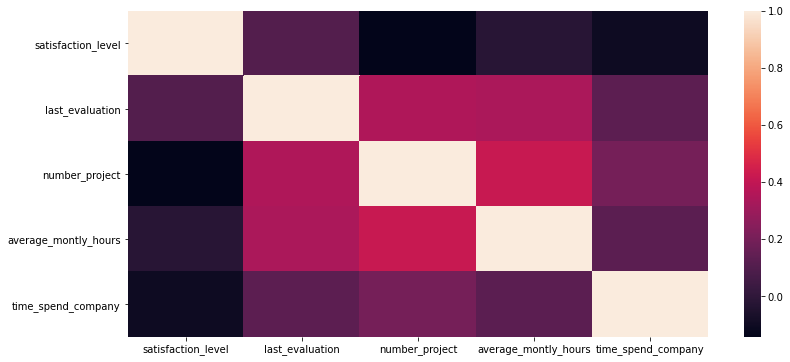

In [67]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


#видно,что наиболее скоррелированными являются величины количества проектов и среднего рабочего времени
#наименее скоррелированы величины уровня удовлетворенности и среднего рабочего времени

Задание 4 
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
#количество сотрудников по департаментам
df['department'].value_counts(sort=False)

management      630
IT             1227
product_mng     902
RandD           787
marketing       858
technical      2720
hr              739
accounting      767
support        2229
sales          4140
Name: department, dtype: int64

Задание 5 Показать распределение сотрудников по зарплатам.

high      1237
medium    6446
low       7316
Name: salary, dtype: int64

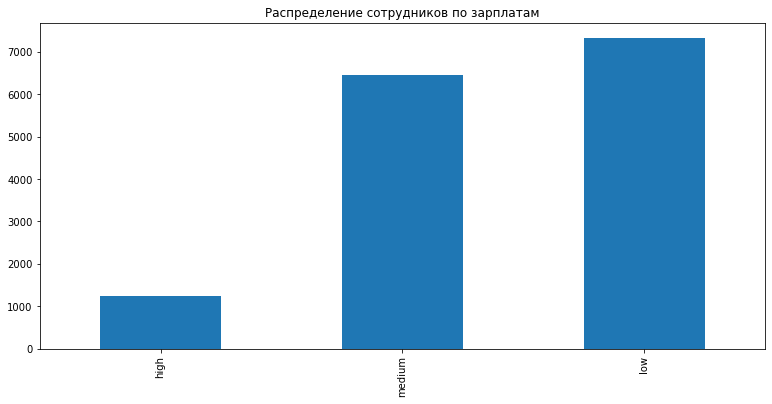

In [75]:
#распределение сотрудников по зарплате

data_by_salary = df['salary'].value_counts(sort=False)
data_by_salary.plot(kind='bar', title='Распределение сотрудников по зарплатам')
data_by_salary 

Задание 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

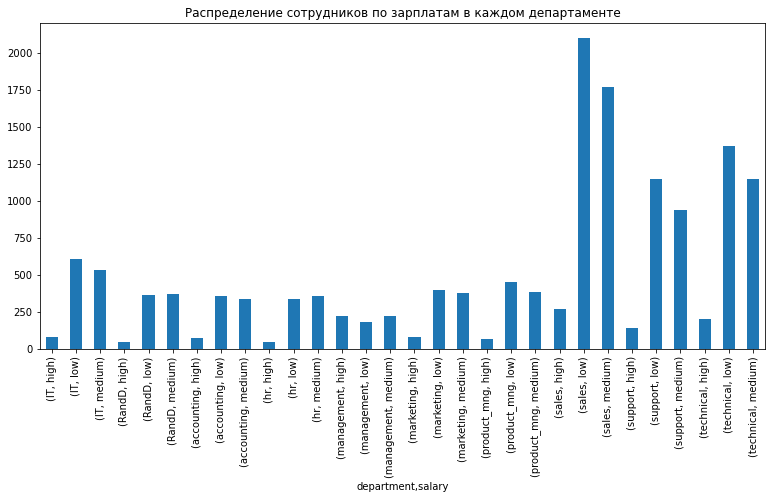

In [74]:
#распределение сотрудников по зарплате в каждом департаменте

departmens_by_salary = df.groupby('department')['salary'].value_counts(sort=False)
departmens_by_salary.plot(kind='bar',title='Распределение сотрудников по зарплатам в каждом департаменте')
departmens_by_salary

Задание 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [62]:
# проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
# нулевая гипотеза - среднее рабочее время у групп с высоким и низким окладами равно 

t , p  = stats.ttest_ind(df[(df['salary']=='high')]['average_montly_hours'], df[(df['salary']=='low')]['average_montly_hours'])
p

#Так как р-уровень значимости больше 0,05, то нулевую гипотезу не отвергаем

0.4661023478267259

Задание 8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    ●Доля сотрудников с повышением за последние 5 лет
    ●Средняя степень удовлетворенности
    ●Среднее количество проектов

In [43]:
#Рассчитаем заданные показатели для уволенных и не уволенных сотрудников

a = df[(df['left']==0)]['promotion_last_5years'].value_counts(sort=False)
a_1 = a[1]/a.sum()
b = df[(df['left']==1)]['promotion_last_5years'].value_counts(sort=False)
b_1 = b[1]/b.sum()
c = df[(df['left']==0)]['satisfaction_level'].mean()
d = df[(df['left']==1)]['satisfaction_level'].mean()
e = df[(df['left']==0)]['number_project'].mean()
f = df[(df['left']==1)]['number_project'].mean()

In [46]:
res = [
...     {'Marks': 'promotion_last_5years', 'Fired': b_1, 'Non-fired': a_1},
...     {'Marks': 'satisfaction_level', 'Fired': d, 'Non-fired': c},
...     {'Marks': 'number_project', 'Fired': f, 'Non-fired': e}
... ]

pd.DataFrame(res)

,Marks,Fired,Non-fired
0,promotion_last_5years,0.005321,0.026251
1,satisfaction_level,0.440098,0.666810
2,number_project,3.855503,3.786664


Задание 9
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [49]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [50]:
#разделим выборку на тестовую и обучающую

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [51]:
#Строим LDA модель на обучающей выборке 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#выполняем предсказания модели на тестовой выборке
lda.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.fillna(0, inplace=True)
result

,left,Unnamed 0
6723,0.0,0.0
6473,0.0,0.0
4679,0.0,0.0
862,1.0,1.0
7286,0.0,0.0
...,...,...
13388,0.0,0.0
10463,0.0,0.0
5331,0.0,0.0
7499,0.0,0.0


In [53]:
#Оценим качество модели

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778